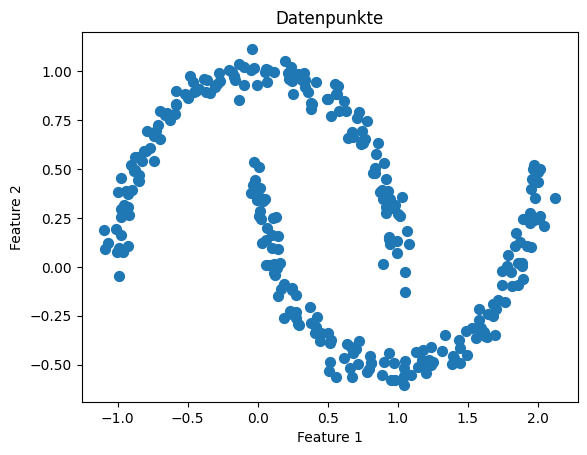

Für n_clusters = 2 ist der Durchschnittliche Silhouette-Score: 0.48848392149304537
Für n_clusters = 3 ist der Durchschnittliche Silhouette-Score: 0.4187316921988861
Für n_clusters = 4 ist der Durchschnittliche Silhouette-Score: 0.4435985808752838


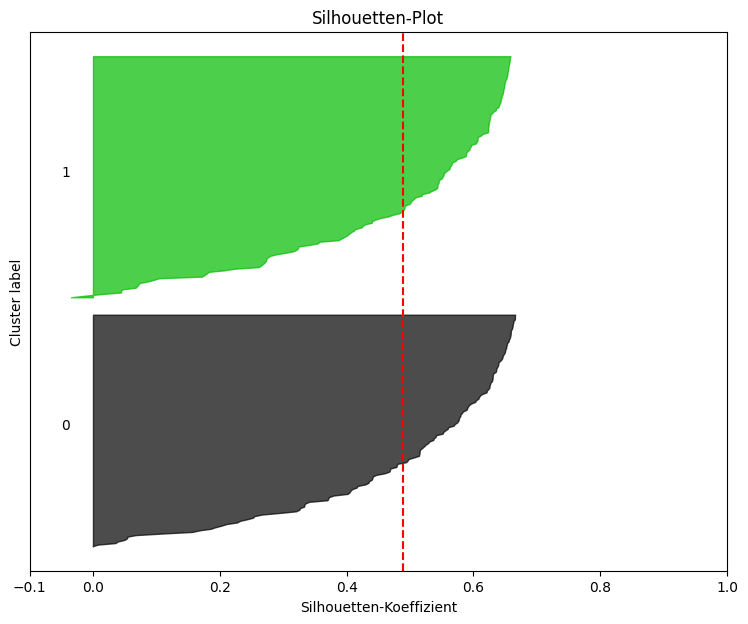

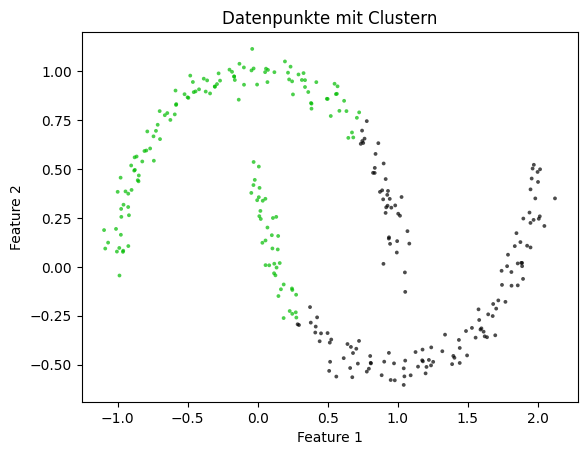

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# 1. Daten generieren (make_moons für überlappende Cluster)
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

# 2. Daten plotten
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Datenpunkte")
plt.show()

# 3. KMeans mit verschiedenen Clusterzahlen und Silhouette-Score
range_n_clusters = [2, 3, 4]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Für n_clusters =",
        n_clusters,
        "ist der Durchschnittliche Silhouette-Score:",
        silhouette_avg,
    )

# 4. Silhouetten-Plot und Datenplot (für optimale Clusteranzahl)
n_clusters = 2  # Hier die optimale Anzahl der Cluster angeben (basierend auf den Scores)
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)


# Silhouetten-Plot
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(9, 7)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("Silhouetten-Plot")
ax1.set_xlabel("Silhouetten-Koeffizient")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()


# Datenplot mit Clusterfarben
plt.figure()
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
plt.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors)
plt.title("Datenpunkte mit Clustern")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Der durchschnittliche Silhouette-Score für DBSCAN beträgt: 0.32847820126315047


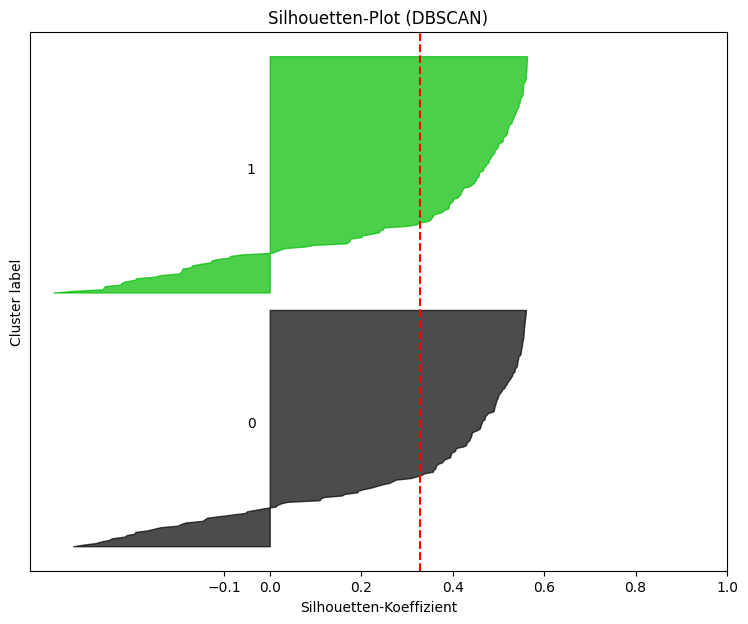

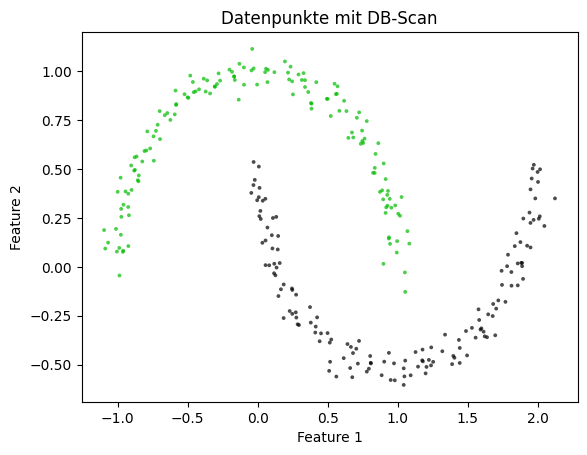

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# 1. Daten generieren (make_moons für überlappende Cluster)
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Anpassen der Parameter eps und min_samples
cluster_labels = dbscan.fit_predict(X)

# Berechne den Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Der durchschnittliche Silhouette-Score für DBSCAN beträgt: {silhouette_avg}")


# 3. Silhouetten-Plot
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(9, 7)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in np.unique(cluster_labels):
    if i == -1: #Noise Punkte extra behandeln
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
      ith_cluster_silhouette_values.sort()
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i
      color = 'grey' #Farbe für Noise Punkte
      ax1.fill_betweenx(
          np.arange(y_lower, y_upper),
          0,
          ith_cluster_silhouette_values,
          facecolor=color,
          edgecolor=color,
          alpha=0.7,
      )
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10
      continue # nächsten cluster
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / len(np.unique(cluster_labels)))
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("Silhouetten-Plot (DBSCAN)")
ax1.set_xlabel("Silhouetten-Koeffizient")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

# 4. Datenplot mit Clusterfarben
plt.figure()
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
plt.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors)
plt.title("Datenpunkte mit DB-Scan")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()